In [1]:
from dl_toolbox.lightning_datamodules import *
import matplotlib.pyplot as plt 
import numpy as np
from skimage import exposure

In [2]:
splitfile_path = '/d/pfournie/ai4geo/splits/digitanie/Biarritz.csv'
data_path = '/data/digitanie_v2'

splitfile_path = '/d/pfournie/ai4geo/splits/semcity/split_semcity.csv'
data_path = '/d/pfournie/ai4geo/data/SemCity-Toulouse-bench'

splitfile_path = '/d/pfournie/ai4geo/splits/airs/airs.csv'
data_path = '/data/AIRS/trainval'

splitfile_path = '/d/pfournie/ai4geo/splits/mw/christchurch.csv'
data_path = '/d/pfournie/ai4geo/data/miniworld_tif'

dm = SplitfileSup(
    splitfile_path=splitfile_path,
    train_folds=(1,2),
    test_folds=(3,4),
    data_path=data_path,
    epoch_len=100,
    sup_batch_size=4,
    workers=0,
    img_aug='d4_color-5',
    crop_size=512,
    labels='base'
)
train_dl = dm.train_dataloader()
val_dl = dm.val_dataloader()


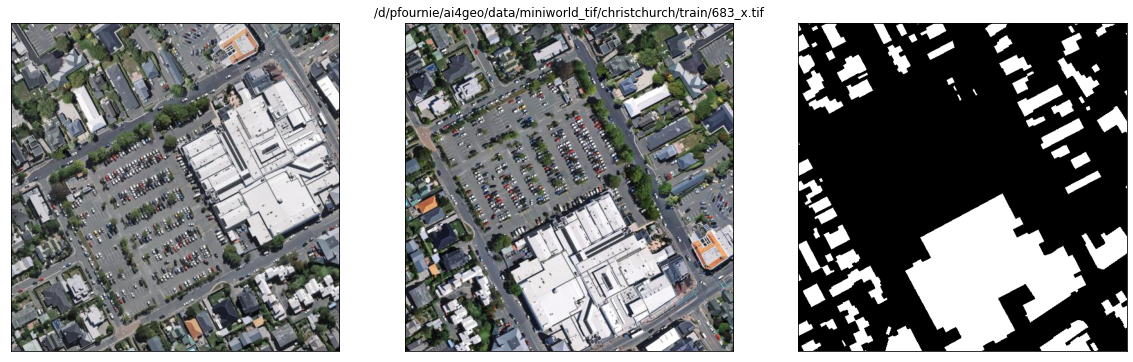

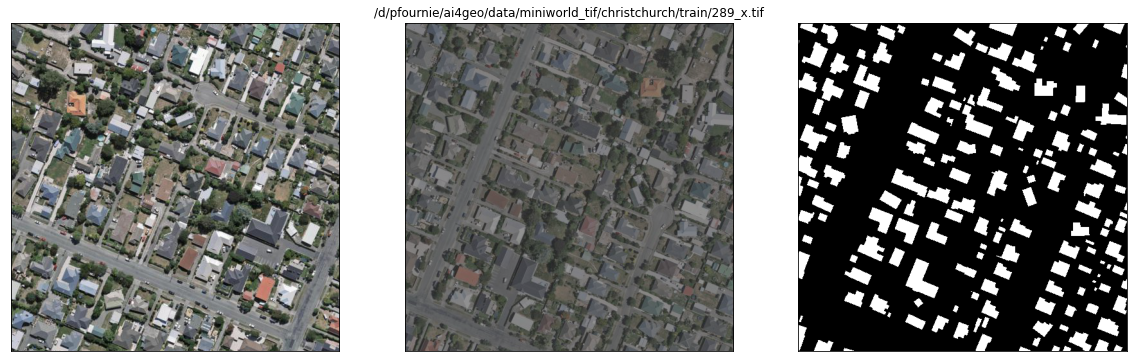

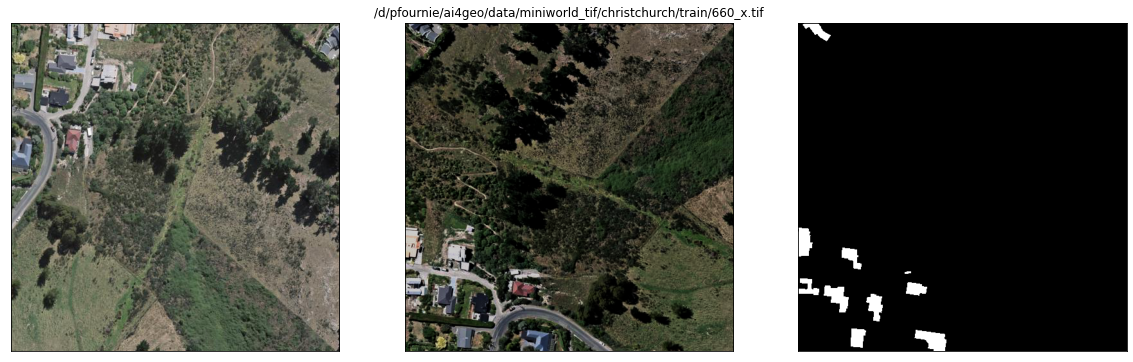

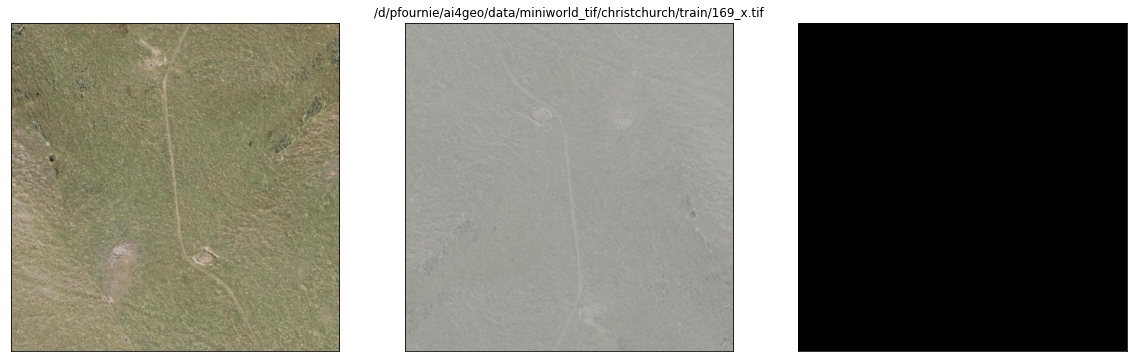

In [5]:
for i, batch in enumerate(train_dl):
    for j in range(4):
        f, ax = plt.subplots(ncols=3, figsize=(20,12))
        ax[0].imshow(batch['orig_image'][j].numpy().transpose(1,2,0))
        ax[1].imshow(batch['image'][j].numpy().transpose(1,2,0))
        ax[2].imshow(dm.train_set.datasets[0].labels_to_rgb(batch['mask'][j].numpy()))
        ax[1].set_title(batch['path'][j])
        for l in range(3):
            ax[l].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()  
    break